In [10]:
import pandas as pd
import numpy as np
import urllib2
from bs4 import BeautifulSoup
from imdbpie import Imdb
from time import sleep
import time
import requests
import string
import csv
import json
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
shows = pd.read_csv('scraped_data3.csv')
shows.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
shows.head()

,json,title_rough,check,title,imdb_id,big_json,seasons,cancelled,runtime,genres,...,imdb_rating,release_date,plot,year,type,votes,metascore,keywords,first_year,is_new
0,"{u'imdbID': u'tt3523560', u'Title': u'Little C...",January 12 - Little Charmers,1,Little Charmers,tt3523560,"{u'totalSeasons': u'2', u'Plot': u'Hip and edg...",2,0,NaN,Animation,...,6.4,12 Jan 2015,Hip and edge animation that welcomes to a worl...,2015–,series,65,NaN,[],2015,1
1,"{u'imdbID': u'tt3596178', u'Title': u'Bella an...",January 17 - Bella and the Bulldogs,1,Bella and the Bulldogs,tt3596178,"{u'totalSeasons': u'2', u'Plot': u'Follows a p...",2,0,30 min,"Comedy, Family",...,5.1,17 Jan 2015,Follows a perky head cheerleader named Bella w...,2015–2016,series,848,NaN,"[texas, cheerleader, high school football, foo...",2015,1
2,"{u'imdbID': u'tt3521854', u'Title': u'Power Ra...",February 7 - Power Rangers Dino Charge,1,Power Rangers Dino Charge,tt3521854,"{u'totalSeasons': u'2', u'Plot': u'On prehisto...",2,0,21 min,"Action, Adventure, Fantasy",...,7.0,07 Feb 2015,"On prehistoric Earth, an alien entrusted power...",2015–,series,547,NaN,[power rangers],2015,1
3,"{u'imdbID': u'tt3219170', u'Title': u'Harvey B...",March 29 - Harvey Beaks,1,Harvey Beaks,tt3219170,"{u'totalSeasons': u'2', u'Plot': u'A mild-mann...",2,0,22 min,"Animation, Comedy, Family",...,6.9,29 Mar 2015,A mild-mannered young bird and his best friend...,2015–,series,646,NaN,[],2015,1
4,"{u'imdbID': u'tt4502154', u'Title': u'Make It ...",April 9 - Make It Pop,1,Make It Pop,tt4502154,"{u'totalSeasons': u'3', u'Plot': u'Sun Hi, Jod...",3,0,30 min,"Comedy, Drama, Musical",...,5.7,26 Mar 2015,"Sun Hi, Jodi and Corki are three girls with di...",2015–,series,364,NaN,[],2015,1


In [7]:
shows.shape

(2590, 21)

In [8]:
## the number of cancelled vs not cancelled shows
shows['cancelled'].value_counts()
## baseline probability is 901/2590

0    1689
1     901
Name: cancelled, dtype: int64

In [9]:
shows.dtypes

json                object
title_rough         object
check                int64
title               object
imdb_id             object
big_json            object
seasons              int64
cancelled            int64
runtime             object
genres              object
parental_rating     object
imdb_rating        float64
release_date        object
plot                object
year                object
type                object
votes               object
metascore          float64
keywords            object
first_year           int64
is_new               int64
dtype: object

In [12]:
shows.isnull().sum()

json                  0
title_rough           0
check                 0
title                 0
imdb_id               0
big_json              0
seasons               0
cancelled             0
runtime             599
genres               80
parental_rating    1737
imdb_rating          70
release_date        221
plot                473
year                  0
type                  0
votes                71
metascore          2590
keywords              0
first_year            0
is_new                0
dtype: int64

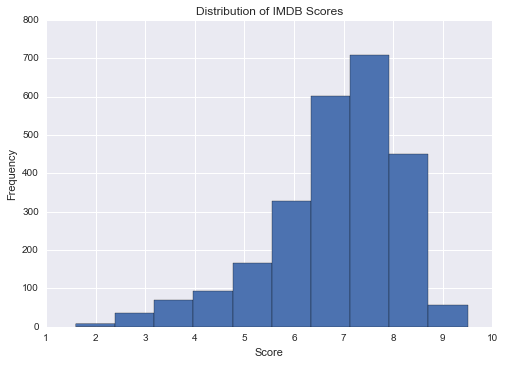

In [16]:
plt.hist(shows['imdb_rating'].dropna())
plt.title('Distribution of IMDB Scores')
plt.ylabel('Frequency')
plt.xlabel('Score')

In [19]:
shows.shape

(2590, 21)

In [20]:
## there seem to be a few shows that started prior to 1980
shows[shows['first_year'] >= 1980].shape

(2573, 21)

In [23]:
newshows = shows[shows['first_year'] >= 1980]

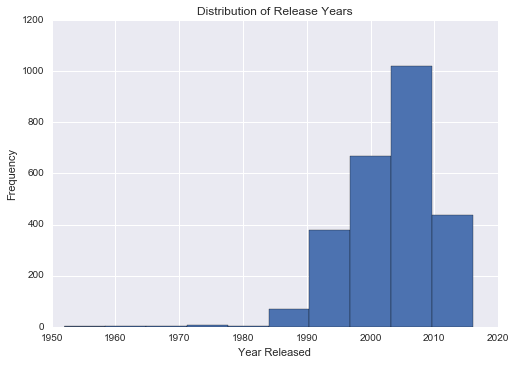

In [25]:
## distribution of release year
plt.hist(shows['first_year'].dropna())
plt.title('Distribution of Release Years')
plt.ylabel('Frequency')
plt.xlabel('Year Released')

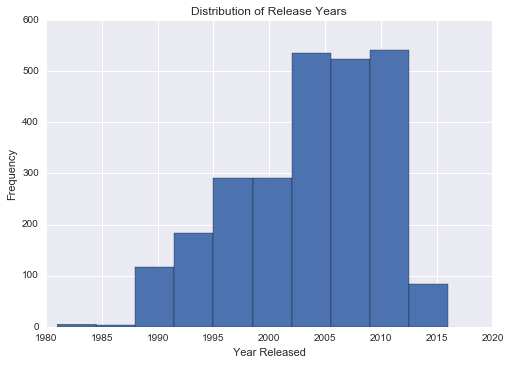

In [24]:
## distribution of release year for only shows starting after 1980
plt.hist(newshows['first_year'])
plt.title('Distribution of Release Years')
plt.ylabel('Frequency')
plt.xlabel('Year Released')

## Keywords

In [51]:
keywords = list(shows['keywords'])

In [55]:
keywords[:10]

['[]',
 '[texas, cheerleader, high school football, football player, female athlete, sportswoman, teenage girl, high school, football, girl on boys team, female football player, teenage protagonist, female protagonist, four word title, character name in title]',
 '[power rangers]',
 '[]',
 '[]',
 '[hospital, medical, los angeles california, latex gloves, doctor, nurse]',
 '[witch]',
 '[texas ranger, female lead, remake, based on tv series]',
 '[chip in head]',
 '[scientist, cdc, outbreak, arctic, pandemic, centers for disease control and prevention, one word series title, research center, deoxyribonucleic acid, dna, science station, genetic experiment, female medical doctor, female doctor, morphine addict, missing children, monkey, rat attack, quarantine, no cellphone signal, science run amok, isolation, head in a jar, zombie, virus, babe scientist]']

In [52]:
all_keywords = []
for i in keywords:
    all_keywords += i

In [54]:
all_keywords[0:20]

['[',
 ']',
 '[',
 't',
 'e',
 'x',
 'a',
 's',
 ',',
 ' ',
 'c',
 'h',
 'e',
 'e',
 'r',
 'l',
 'e',
 'a',
 'd',
 'e']

## Genres

In [32]:
genres = list(shows['genres'].dropna())

In [33]:
len(genres)

2510

In [35]:
set(genres)[0:10]

TypeError: 'set' object has no attribute '__getitem__'

In [36]:
for i in genres:
    print i

Animation
Comedy, Family
Action, Adventure, Fantasy
Animation, Comedy, Family
Comedy, Drama, Musical
Drama
Comedy, Drama, Family
Drama, Western
Action, Drama, Sci-Fi
Sci-Fi, Thriller
Animation
Animation, Comedy, Family
Drama, Mystery, Sci-Fi
Animation, Family, Fantasy
Music, Reality-TV
Animation
Animation, Adventure, Comedy
Comedy, Drama, Mystery
Drama, Mystery, Sci-Fi
Game-Show
Biography, Drama, Reality-TV
Animation, Comedy
Animation, Comedy, Fantasy
Animation, Comedy, Fantasy
Animation, Adventure, Comedy
Comedy, Drama, Family
Comedy, Crime
Comedy, Family, Music
Crime, Drama, Mystery
Comedy, Talk-Show
Comedy, Drama, Romance
Drama, Romance, Thriller
Comedy, Thriller
Comedy
Comedy
Comedy
Comedy
Game-Show, Reality-TV
Animation
Comedy
Comedy
Comedy
Comedy
Action, Drama, Sci-Fi
Adventure, Drama, Fantasy
Drama, Fantasy
Drama, Horror, Romance
Comedy, Talk-Show
Animation, Adventure, Comedy
Comedy
Crime, Drama, Mystery
Comedy, Drama
Action, Drama, Mystery
Reality-TV
Comedy
Comedy, Crime, Drama

In [37]:
all_genres = []
for i in genres:
    all_genres += i
    

In [38]:
all_genres[0:20]

['A',
 'n',
 'i',
 'm',
 'a',
 't',
 'i',
 'o',
 'n',
 'C',
 'o',
 'm',
 'e',
 'd',
 'y',
 ',',
 ' ',
 'F',
 'a',
 'm']